In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
import sys
sys.path.append("..")

In [4]:
import pandas as pd

SAVE_DIR = "../data"

file_criteo = SAVE_DIR + "/criteo-uplift-v2.1.csv"

df_criteo = pd.read_csv(file_criteo, sep=',')
df_criteo

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616365,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616365,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616365,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616365,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616365,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979587,26.297764,10.059654,9.006250,4.679882,10.280525,4.115453,-3.282109,4.833815,3.839578,13.190056,5.300375,-0.168679,1,0,0,0
13979588,12.642207,10.679513,8.214383,-1.700105,10.280525,3.013064,-13.955150,6.269026,3.971858,13.190056,5.300375,-0.168679,1,0,0,1
13979589,12.976557,10.059654,8.381868,0.842442,11.029584,4.115453,-8.281971,4.833815,3.779212,23.570168,6.169187,-0.168679,1,0,1,0
13979590,24.805064,10.059654,8.214383,4.679882,10.280525,4.115453,-1.288207,4.833815,3.971858,13.190056,5.300375,-0.168679,1,0,0,0


In [5]:
random_state=20220720
df_criteo=df_criteo.sample(frac=1.0, random_state=random_state).reset_index(drop=True)

In [6]:
X = df_criteo[['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']].values
X.shape

(13979592, 12)

In [7]:
def scaling(x, min, max):
    return np.where(x < min, 0.0, np.where(x > max, 1.0, (x - min) / (max - min)))

In [8]:
import numpy as np
X[:, 0] = scaling(X[:, 0], min=np.min(X[:, 0]), max=np.max(X[:, 0]))
X[:, 1] = scaling(X[:, 1], min=np.min(X[:, 1]), max=np.max(X[:, 1]))
X[:, 2] = scaling(X[:, 2], min=np.min(X[:, 2]), max=np.max(X[:, 2]))
X[:, 3] = scaling(X[:, 3], min=np.min(X[:, 3]), max=np.max(X[:, 3]))
X[:, 4] = scaling(X[:, 4], min=np.min(X[:, 4]), max=np.max(X[:, 4]))
X[:, 5] = scaling(X[:, 5], min=np.min(X[:, 5]), max=np.max(X[:, 5]))
X[:, 6] = scaling(X[:, 6], min=np.min(X[:, 6]), max=np.max(X[:, 6]))
X[:, 7] = scaling(X[:, 7], min=np.min(X[:, 7]), max=np.max(X[:, 7]))
X[:, 8] = scaling(X[:, 8], min=np.min(X[:, 8]), max=np.max(X[:, 8]))
X[:, 9] = scaling(X[:, 9], min=np.min(X[:, 9]), max=np.max(X[:, 9]))
X[:, 10] = scaling(X[:, 10], min=np.min(X[:, 10]), max=np.max(X[:, 10]))
X[:, 11] = scaling(X[:, 11], min=np.min(X[:, 11]), max=np.max(X[:, 11]))

In [9]:
T = df_criteo['treatment'].values.reshape(-1, 1)
Y_visit = df_criteo['visit'].values.reshape(-1, 1)
Y_conv = df_criteo['conversion'].values.reshape(-1, 1)

T.shape, Y_visit.shape, Y_conv.shape

((13979592, 1), (13979592, 1), (13979592, 1))

In [10]:
train_len = int(len(X) * 0.7)

X_train = X[:train_len, :]
T_train = T[:train_len, :]
Y_visit_train = Y_visit[:train_len, :]
Y_conv_train = Y_conv[:train_len, :]

X_test = X[train_len:, :]
T_test = T[train_len:, :]
Y_visit_test = Y_visit[train_len:, :]
Y_conv_test = Y_conv[train_len:, :]

train_len, X_train.shape, X_test.shape

(9785714, (9785714, 12), (4193878, 12))

In [11]:
sys.path.append("..")
from model.uplift_model import *

In [12]:
import matplotlib.pyplot as plt

def plot_loss(history, *losses):
    for loss in losses:
        plt.plot(history.history[loss], label=loss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [14]:
count = 20


trainable_weights
p1_hidden_1/kernel:0
p1_hidden_1/bias:0
p1/kernel:0
p1/bias:0
non_trainable_weights
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
p0_raw_features (InputLayer)    [(None, 12)]         0                                            
__________________________________________________________________________________________________
p1_hidden_1 (Dense)             (None, 8)            104         p0_raw_features[0][0]            
__________________________________________________________________________________________________
treated_input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
reward_input (InputLayer)       [(None, 1)]          0                                     

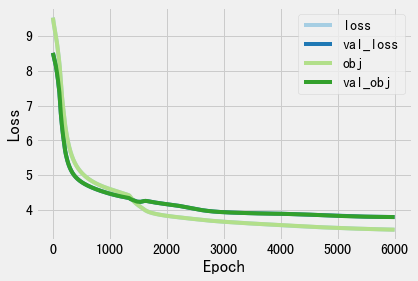

iteration =  2


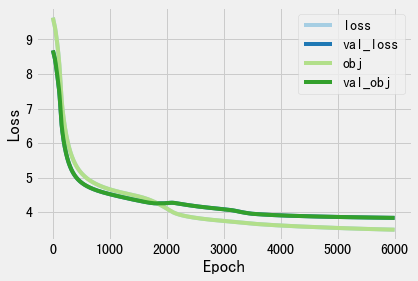

iteration =  3


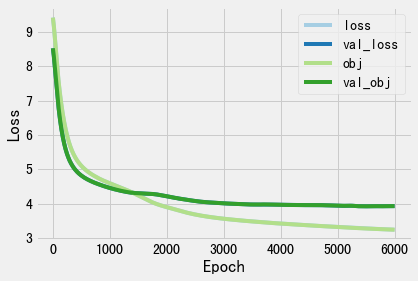

iteration =  4


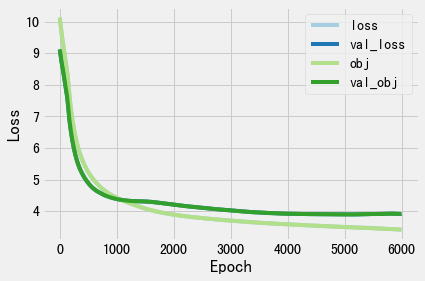

iteration =  5


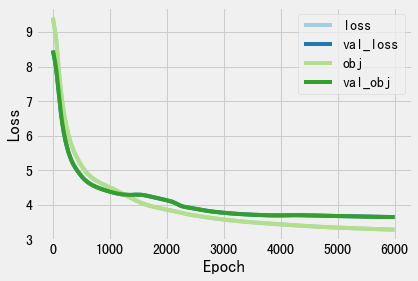

iteration =  6


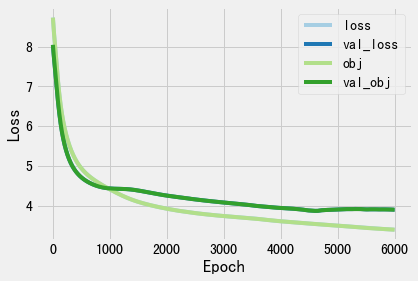

iteration =  7


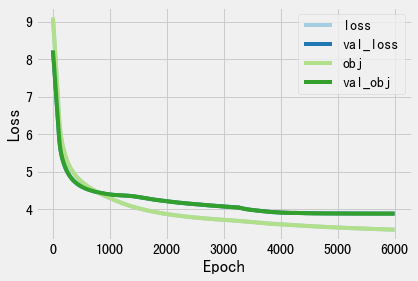

iteration =  8


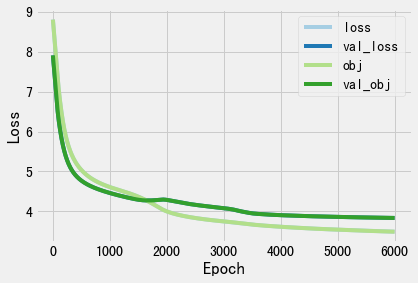

iteration =  9


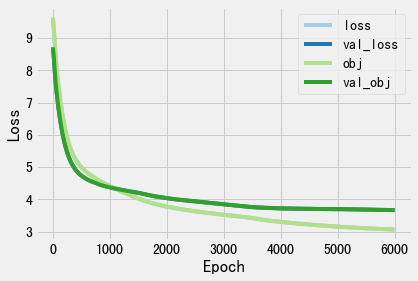

iteration =  10


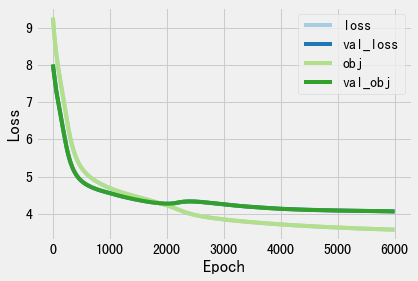

iteration =  11


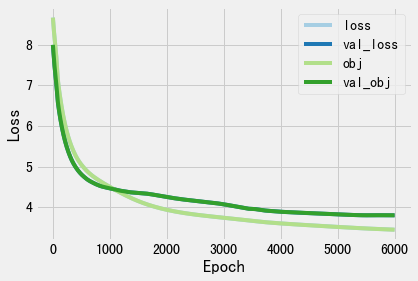

iteration =  12


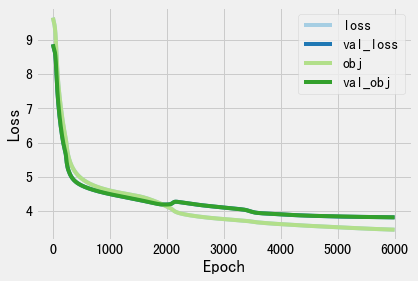

iteration =  13


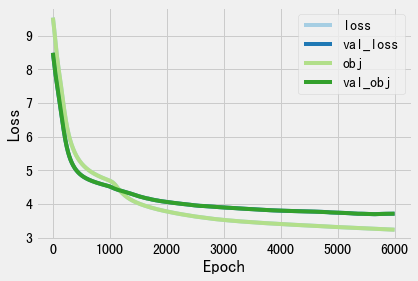

iteration =  14


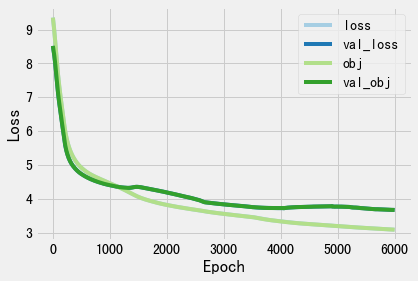

iteration =  15


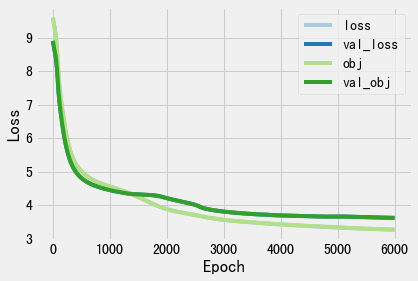

iteration =  16


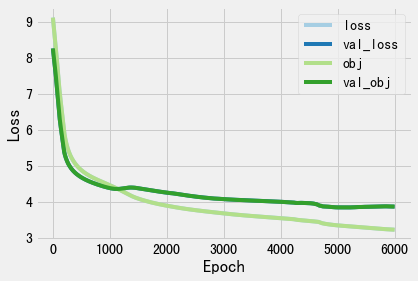

iteration =  17


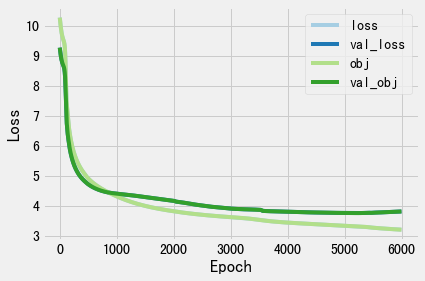

iteration =  18


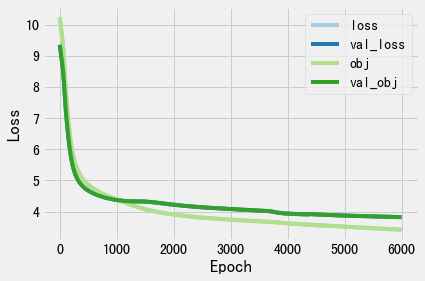

iteration =  19


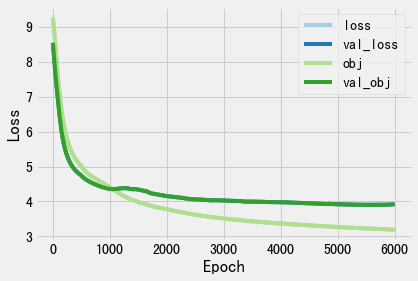

iteration =  20


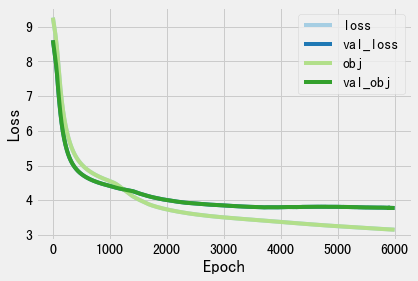

In [15]:
# DIRECT RANK MODEL
# 1e-6
import keras
import keras.backend as K
import tensorflow as tf
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from model.roi_model import *

final_model = get_direct_rank_criteo_model()
final_model.compile(loss=None, optimizer='adam')
#lambda y_true,y_pred: y_pred
print('trainable_weights')
for x in final_model.trainable_weights:
    print(x.name)
print('non_trainable_weights')
for x in final_model.non_trainable_weights:
    print(x.name)
final_model.summary()


for i in range(count):

    print("iteration = ", i + 1)
    
    final_model = get_direct_rank_criteo_model()
    final_model.compile(loss=None, optimizer='adam')

    mcp_save = ModelCheckpoint('../model_file/roi/criteo/final_model/direct_rank/direct_rank_criteo_model_{}.h5'.format(i+1), save_best_only=False, monitor='val_loss', mode='min', save_weights_only=True)
    history = final_model.fit([X_train, T_train, Y_conv_train, Y_visit_train], validation_split=0.2, epochs=6000, batch_size=10000000, shuffle=True, verbose=0, callbacks=[mcp_save])

    
    plot_loss(history, "loss", "val_loss", "obj", "val_obj")


iteration =  1


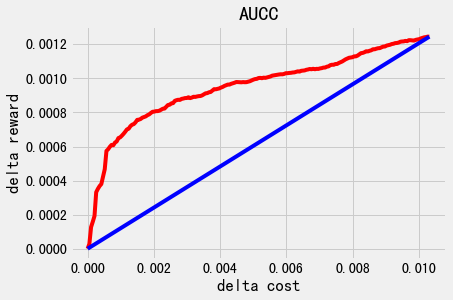

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000028,2017,343,1.000000,1.000000
2,0.000103,0.000127,7827,1357,1.000000,1.000000
3,0.000155,0.000158,11048,1918,1.000000,1.000000
4,0.000207,0.000192,14282,2459,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001238,3477416,613907,-0.895204,-0.893256
197,0.010161,0.001241,3490634,616143,-0.895601,-0.893644
198,0.010212,0.001242,3516804,620700,-0.896378,-0.894424
199,0.010264,0.001245,3536064,624092,-0.896942,-0.894998


aucc =  0.7624512287120833


iteration =  2


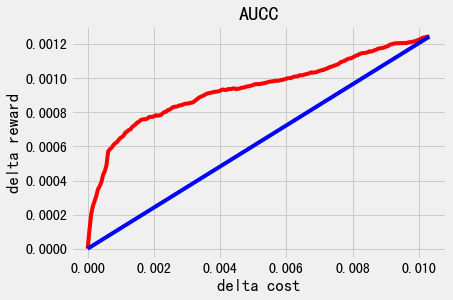

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000105,10578,1843,1.000000,1.000000
2,0.000103,0.000199,18216,3250,1.000000,1.000000
3,0.000155,0.000248,21307,3788,1.000000,1.000000
4,0.000206,0.000278,23167,4077,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001237,3484297,615092,-0.892740,-0.890622
197,0.010161,0.001240,3504587,618645,-0.893361,-0.891250
198,0.010212,0.001242,3526603,622564,-0.894027,-0.891934
199,0.010264,0.001245,3550764,626801,-0.894748,-0.892665


aucc =  0.7504114753560194


iteration =  3


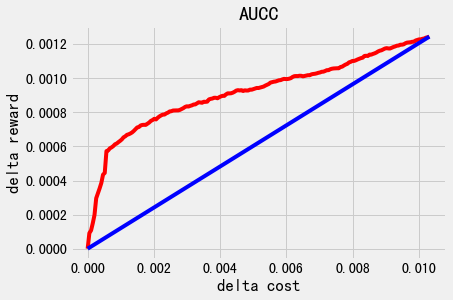

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000091,4354,769,1.000000,1.000000
2,0.000103,0.000108,5597,960,1.000000,1.000000
3,0.000155,0.000150,7239,1238,1.000000,1.000000
4,0.000206,0.000198,8895,1535,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001232,3480118,614468,-0.913864,-0.912052
197,0.010161,0.001234,3507020,619034,-0.914525,-0.912700
198,0.010212,0.001239,3521723,621622,-0.914882,-0.913064
199,0.010264,0.001241,3537274,624360,-0.915256,-0.913445


aucc =  0.7369460356607708


iteration =  4


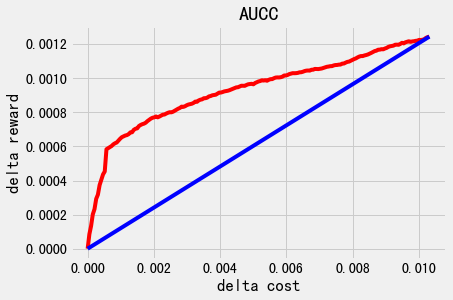

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000085,3970,686,1.000000,1.000000
2,0.000103,0.000133,6515,1103,1.000000,1.000000
3,0.000155,0.000201,9278,1574,1.000000,1.000000
4,0.000206,0.000232,12520,2128,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001226,3458111,610595,-0.901325,-0.899286
197,0.010161,0.001229,3484400,615071,-0.902069,-0.900019
198,0.010212,0.001237,3518124,621003,-0.903008,-0.900974
199,0.010264,0.001242,3543943,625590,-0.903715,-0.901700


aucc =  0.7479197434356871


iteration =  5


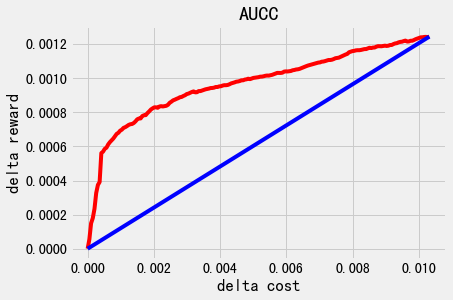

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000055,7424,1293,1.000000,1.000000
2,0.000103,0.000149,16690,2963,1.000000,1.000000
3,0.000155,0.000179,19633,3457,1.000000,1.000000
4,0.000206,0.000234,22526,3946,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001241,3532728,623692,-0.887638,-0.886160
197,0.010161,0.001243,3544764,625750,-0.888020,-0.886535
198,0.010212,0.001243,3552371,627086,-0.888260,-0.886777
199,0.010264,0.001242,3556698,627767,-0.888396,-0.886899


aucc =  0.7765496392112516


iteration =  6


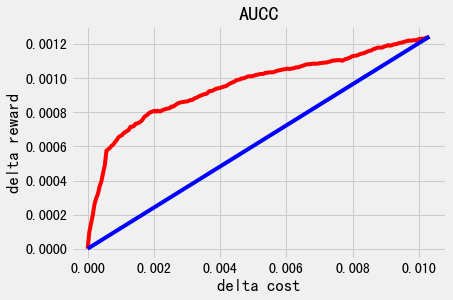

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000101,8941,1599,1.000000,1.000000
2,0.000103,0.000149,11959,2130,1.000000,1.000000
3,0.000155,0.000197,14111,2492,1.000000,1.000000
4,0.000206,0.000262,17920,3106,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001232,3467762,612215,-0.896739,-0.894603
197,0.010161,0.001234,3480903,614526,-0.897129,-0.894999
198,0.010212,0.001238,3506062,618933,-0.897867,-0.895747
199,0.010264,0.001241,3535915,624150,-0.898730,-0.896618


aucc =  0.7673229859464519


iteration =  7


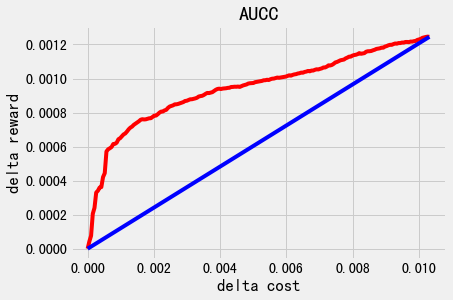

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000043,3460,584,1.000000,1.000000
2,0.000103,0.000076,5821,977,1.000000,1.000000
3,0.000155,0.000205,16205,2823,1.000000,1.000000
4,0.000207,0.000240,19755,3443,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001239,3486582,615496,-0.896190,-0.894098
197,0.010161,0.001242,3502603,618285,-0.896664,-0.894576
198,0.010212,0.001244,3522297,621784,-0.897242,-0.895169
199,0.010264,0.001246,3538131,624544,-0.897702,-0.895632


aucc =  0.7564451149153251


iteration =  8


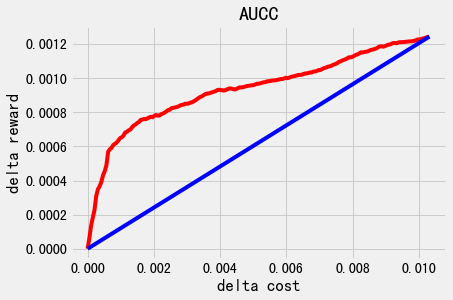

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000062,4831,862,1.000000,1.000000
2,0.000103,0.000134,8512,1507,1.000000,1.000000
3,0.000155,0.000182,14319,2540,1.000000,1.000000
4,0.000206,0.000227,18491,3263,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001234,3486925,615633,-0.893172,-0.891075
197,0.010161,0.001235,3504458,618619,-0.893706,-0.891600
198,0.010212,0.001240,3521255,621538,-0.894213,-0.892110
199,0.010264,0.001242,3545868,625862,-0.894947,-0.892855


aucc =  0.7515078170596795


iteration =  9


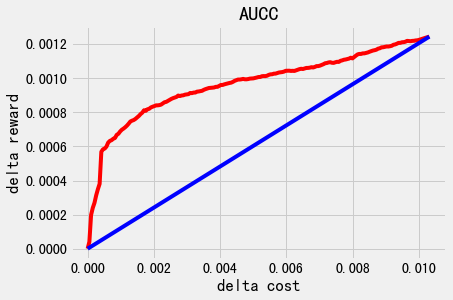

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000041,3438,570,1.000000,1.000000
2,0.000103,0.000198,10855,1902,1.000000,1.000000
3,0.000155,0.000240,13320,2318,1.000000,1.000000
4,0.000206,0.000269,17001,2990,0.999996,0.999996
...,...,...,...,...,...,...
196,0.010109,0.001232,3486442,615565,-0.906687,-0.904820
197,0.010161,0.001236,3507341,619278,-0.907243,-0.905391
198,0.010212,0.001239,3524056,622193,-0.907683,-0.905834
199,0.010264,0.001242,3549084,626485,-0.908334,-0.906479


aucc =  0.7749906096199423


iteration =  10


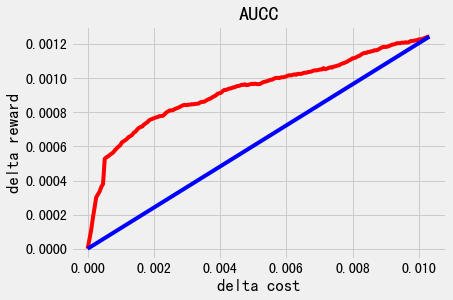

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000052,4038,677,1.000000,1.000000
2,0.000103,0.000106,5884,976,1.000000,1.000000
3,0.000155,0.000176,13418,2320,1.000000,1.000000
4,0.000206,0.000237,18814,3240,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001231,3479146,614213,-0.896291,-0.894134
197,0.010161,0.001236,3502027,618169,-0.896969,-0.894812
198,0.010212,0.001239,3523372,621969,-0.897593,-0.895454
199,0.010264,0.001244,3549043,626559,-0.898333,-0.896220


aucc =  0.7443413475323222


iteration =  11


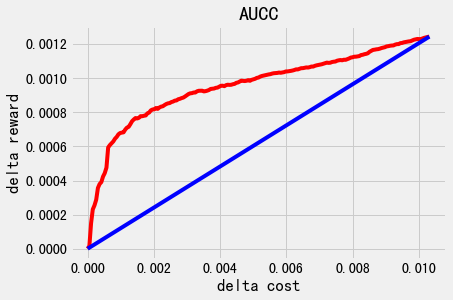

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000016,1680,266,1.000000,1.000000
2,0.000103,0.000150,12502,2186,1.000000,1.000000
3,0.000155,0.000231,17220,3015,1.000000,1.000000
4,0.000206,0.000254,19107,3333,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001234,3478345,613972,-0.891071,-0.889096
197,0.010161,0.001238,3503247,618454,-0.891845,-0.889900
198,0.010212,0.001241,3517845,621040,-0.892294,-0.890358
199,0.010264,0.001243,3547623,626234,-0.893198,-0.891267


aucc =  0.7683742774984845


iteration =  12


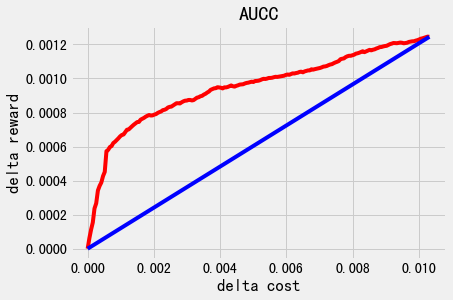

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000061,4139,727,1.000000,1.000000
2,0.000103,0.000112,8088,1427,1.000000,1.000000
3,0.000155,0.000154,13145,2322,1.000000,1.000000
4,0.000206,0.000236,20277,3556,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001236,3481578,614746,-0.895149,-0.893128
197,0.010161,0.001239,3496006,617246,-0.895582,-0.893561
198,0.010212,0.001243,3521714,621737,-0.896344,-0.894330
199,0.010264,0.001246,3546882,626074,-0.897079,-0.895062


aucc =  0.7597817091603388


iteration =  13


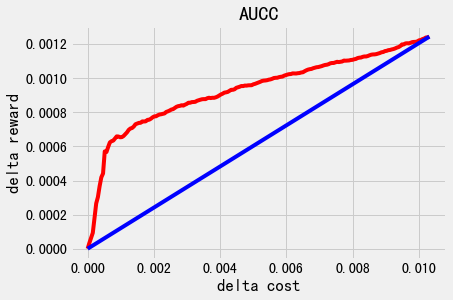

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000034,1553,230,1.000000,1.000000
2,0.000103,0.000064,4305,703,1.000000,1.000000
3,0.000155,0.000093,5562,914,1.000000,1.000000
4,0.000206,0.000177,11315,1942,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001230,3369676,594593,-0.908989,-0.907239
197,0.010161,0.001234,3420169,603640,-0.910332,-0.908630
198,0.010212,0.001240,3463608,611408,-0.911457,-0.909791
199,0.010264,0.001241,3502074,618156,-0.912429,-0.910775


aucc =  0.7482845217544425


iteration =  14


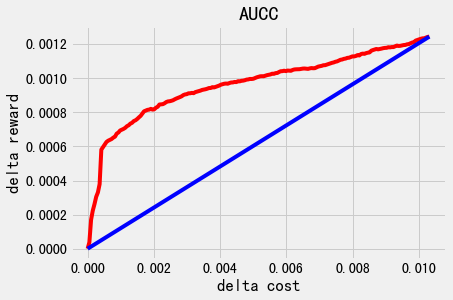

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000038,1279,203,1.000000,1.000000
2,0.000103,0.000170,9797,1717,1.000000,1.000000
3,0.000155,0.000224,12950,2286,0.999999,0.999999
4,0.000206,0.000262,16380,2858,0.999995,0.999996
...,...,...,...,...,...,...
196,0.010109,0.001235,3484290,614840,-0.906815,-0.904593
197,0.010161,0.001235,3500159,617710,-0.907237,-0.905037
198,0.010212,0.001239,3521856,621576,-0.907809,-0.905627
199,0.010264,0.001243,3546129,625919,-0.908440,-0.906282


aucc =  0.7731222905895149


iteration =  15


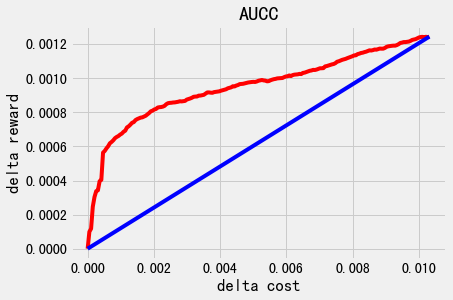

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000099,11967,2151,1.000000,1.000000
2,0.000103,0.000118,14817,2616,1.000000,1.000000
3,0.000155,0.000246,24011,4269,1.000000,1.000000
4,0.000206,0.000304,31910,5651,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001244,3529265,622968,-0.877294,-0.876961
197,0.010161,0.001239,3536286,624141,-0.877538,-0.877192
198,0.010212,0.001244,3550092,626604,-0.878014,-0.877675
199,0.010264,0.001241,3559826,628338,-0.878347,-0.878013


aucc =  0.762149757002795


iteration =  16


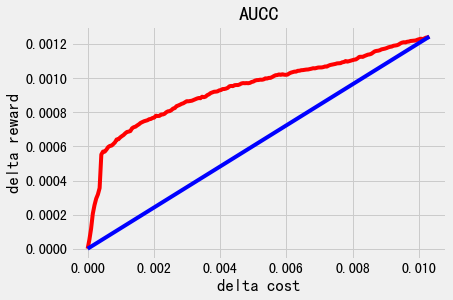

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000052,2726,456,1.000000,1.000000
2,0.000103,0.000117,7016,1178,1.000000,1.000000
3,0.000155,0.000205,10686,1820,1.000000,1.000000
4,0.000206,0.000256,12399,2087,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001230,3475772,613697,-0.915482,-0.913528
197,0.010161,0.001234,3498350,617558,-0.916027,-0.914069
198,0.010212,0.001239,3514577,620349,-0.916415,-0.914455
199,0.010264,0.001240,3541128,625044,-0.917042,-0.915098


aucc =  0.755330056704559


iteration =  17


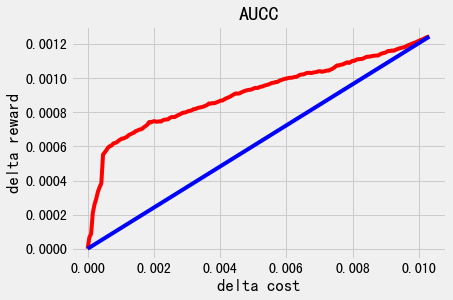

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000066,3764,628,1.000000,1.000000
2,0.000103,0.000087,5077,835,1.000000,1.000000
3,0.000155,0.000209,11472,1961,1.000000,1.000000
4,0.000206,0.000259,14250,2438,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001228,3461909,611053,-0.913879,-0.911954
197,0.010161,0.001234,3484198,615055,-0.914430,-0.912527
198,0.010212,0.001239,3508063,619243,-0.915012,-0.913118
199,0.010264,0.001243,3536911,624307,-0.915705,-0.913823


aucc =  0.7310879092818368


iteration =  18


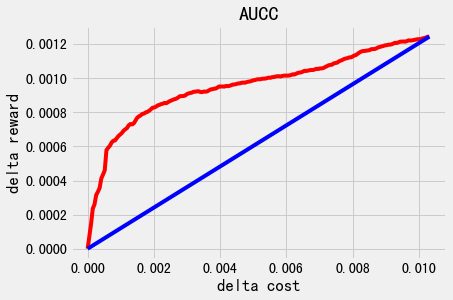

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000075,10670,1877,1.000000,1.000000
2,0.000103,0.000146,14887,2597,1.000000,1.000000
3,0.000155,0.000235,20693,3621,1.000000,1.000000
4,0.000207,0.000260,21875,3799,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001234,3488352,615790,-0.893277,-0.891233
197,0.010161,0.001237,3513351,620230,-0.894036,-0.892012
198,0.010212,0.001240,3528870,622920,-0.894502,-0.892478
199,0.010264,0.001244,3548725,626421,-0.895092,-0.893079


aucc =  0.7671433502418229


iteration =  19


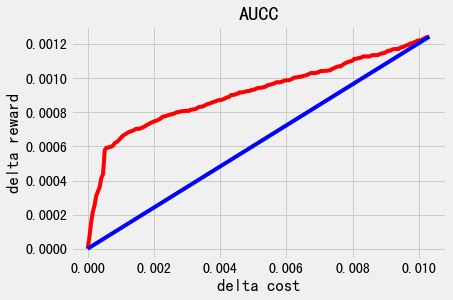

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000065,4266,770,1.000000,1.000000
2,0.000103,0.000152,9034,1583,1.000000,1.000000
3,0.000155,0.000216,12356,2139,1.000000,1.000000
4,0.000206,0.000253,14945,2585,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001228,3462326,611010,-0.907428,-0.905252
197,0.010161,0.001234,3487849,615523,-0.908105,-0.905947
198,0.010212,0.001240,3525591,622349,-0.909089,-0.906978
199,0.010264,0.001242,3543928,625509,-0.909559,-0.907448


aucc =  0.7327306127849209


iteration =  20


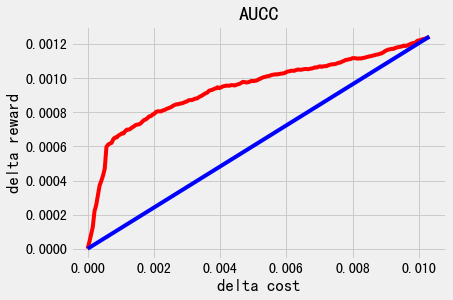

,delta_cost,delta_reward,n_treatment,n_control,roi_pred_treatment,roi_pred_control
0,0.000000,0.000000,0,0,0.000000,0.000000
1,0.000052,0.000040,3092,507,1.000000,1.000000
2,0.000103,0.000083,4725,783,1.000000,1.000000
3,0.000155,0.000127,6423,1055,1.000000,1.000000
4,0.000206,0.000220,13121,2254,1.000000,1.000000
...,...,...,...,...,...,...
196,0.010109,0.001230,3446409,608016,-0.925167,-0.924311
197,0.010161,0.001231,3482176,614389,-0.925936,-0.925096
198,0.010212,0.001234,3502187,617967,-0.926359,-0.925530
199,0.010264,0.001239,3530151,622956,-0.926943,-0.926126


aucc =  0.7562224901519135




In [16]:
import sklearn 
import sklearn.metrics
from evaluation.UpliftMetric import *

direct_rank_aucc_list = []

for i in range(count):
    
    print("iteration = ", i + 1)
    
    final_model = get_direct_rank_criteo_model()
    final_model.load_weights('../model_file/roi/criteo/final_model/direct_rank/direct_rank_criteo_model_{}.h5'.format(i+1))

    direct_rank_pre = final_model.predict([X_test, T_test, Y_conv_test, Y_visit_test])
    
    direct_rank_aucc = get_uplift_model_aucc(t=(T_test > 0.5).flatten(), y_reward=Y_conv_test.flatten(), y_cost=Y_visit_test.flatten(), roi_pred=direct_rank_pre.flatten(), quantile=200)
    
    direct_rank_aucc_list.append(direct_rank_aucc)
    
    print("\n")


In [19]:
direct_rank_aucc_score_list = np.array([direct_rank_aucc_list[i][0] for i in range(count)])
print("direct rank aucc mean: ", np.mean(direct_rank_aucc_score_list))
print("direct rank aucc var: ", np.var(direct_rank_aucc_score_list))
print("direct rank aucc std: ", np.std(direct_rank_aucc_score_list))

direct rank aucc mean:  0.7561556486310079
direct rank aucc var:  0.00017064233628216372
direct rank aucc std:  0.013063014058101742


In [20]:
import pandas as pd

def get_aucc_cost_curve(aucc_list):
    delta_cost_list_group = np.array([aucc[1] for aucc in aucc_list])
    delta_reward_list_group = np.array([aucc[2] for aucc in aucc_list])
    
    avg_delta_cost_list = np.mean(delta_cost_list_group, axis=0)
    avg_delta_reward_list = np.mean(delta_reward_list_group, axis=0)
    
    df_aucc_cost_curve = pd.DataFrame(avg_delta_cost_list, columns=['delta_cost'])
    df_aucc_cost_curve['delta_reward'] = avg_delta_reward_list
    
    return df_aucc_cost_curve

In [21]:
df_dr_aucc_cost_curve = get_aucc_cost_curve(direct_rank_aucc_list)
df_dr_aucc_cost_curve

,delta_cost,delta_reward
0,0.000000,0.000000
1,0.000052,0.000061
2,0.000103,0.000129
3,0.000155,0.000194
4,0.000206,0.000242
...,...,...
196,0.010109,0.001234
197,0.010161,0.001236
198,0.010212,0.001240
199,0.010264,0.001243


In [22]:
np.sum(df_dr_aucc_cost_curve['delta_reward'].values) / (df_dr_aucc_cost_curve['delta_reward'].values[-1] * 201)

0.756155648631008

In [24]:
df_dr_aucc_cost_curve.to_csv("../figure/roi/figure_data/criteo/aucc_cost_curve_criteo/direct_rank_avg_aucc_cost_curve.csv")